In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import random
from scipy import stats
from collections import deque

In [2]:
"""
for google colab support
"""

from google.colab import drive
import os

gdrive_path='/content/gdrive/MyDrive/BA/4Colors10k'

# This will mount your google drive under 'MyDrive'
drive.mount('/content/gdrive', force_remount=True)
# In order to access the files in this notebook we have to navigate to the correct folder
os.chdir(gdrive_path)
# Check manually if all files are present
print(sorted(os.listdir()))

Mounted at /content/gdrive
['BaselineStats', 'Baseline_4Colors.csv', 'Kopie von 4Colors.ipynb', 'Strat1Compare.ipynb', 'Strat2Compareipynb', 'Strat3Compare.ipynb', 'cities.csv', 'combined_4Color.csv', 'combined_MUL_4Color.csv', 'combined_MUL_DC_sum_4Color.csv', 'combined_MUL_DC_sum_repeat_4Color.csv', 'combined_MUL_repeat_4Color.csv', 'combined_SUM_4Color.csv', 'combined_SUM_DC_sum_4Color.csv', 'combined_SUM_DC_sum_repeat_4Color.csv', 'combined_SUM_repeat_4Color.csv', 'combined_repeat_4Color.csv', 'disease_counters.csv', 'edges.csv', 'highest_degree_4Color.csv', 'highest_degree_repeat_4Color.csv', 'most_cubes_4Color.csv', 'most_cubes_repeat_4Color.csv', 'node_positions.csv', 'random_4Color.csv', 'random_repeat_4Color.csv']


In [3]:
strat1 = ["random", "random_repeat", "most_cubes", "most_cubes_repeat",
          "highest_degree", "highest_degree_repeat"]

strat2 = ["combined","combined_repeat", "combined_SUM", "combined_SUM_repeat",
          "combined_MUL", "combined_MUL_repeat"]

strat3 = ["combined_SUM_DC_sum","combined_SUM_DC_sum_repeat", "combined_MUL_DC_sum",
          "combined_MUL_DC_sum_repeat"]


In [4]:
num_simulations = 10000

k_actions_range = range(9)

epidemic_cards = [0,1,2,3,4,5,6]


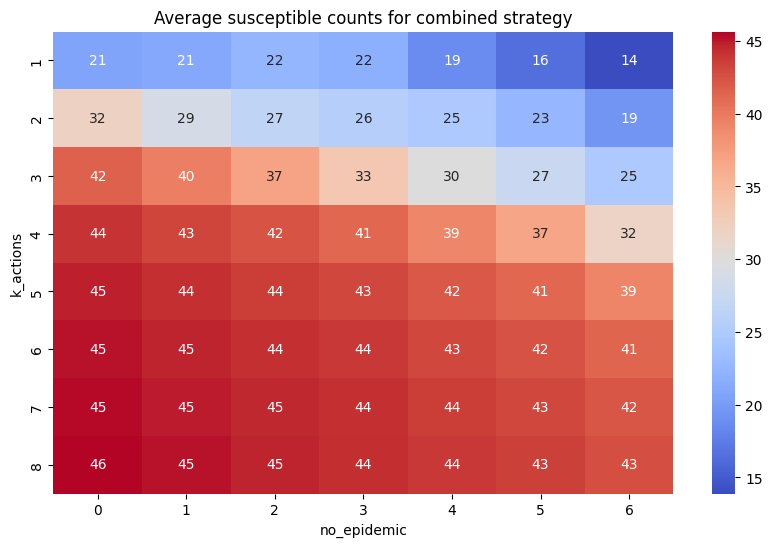

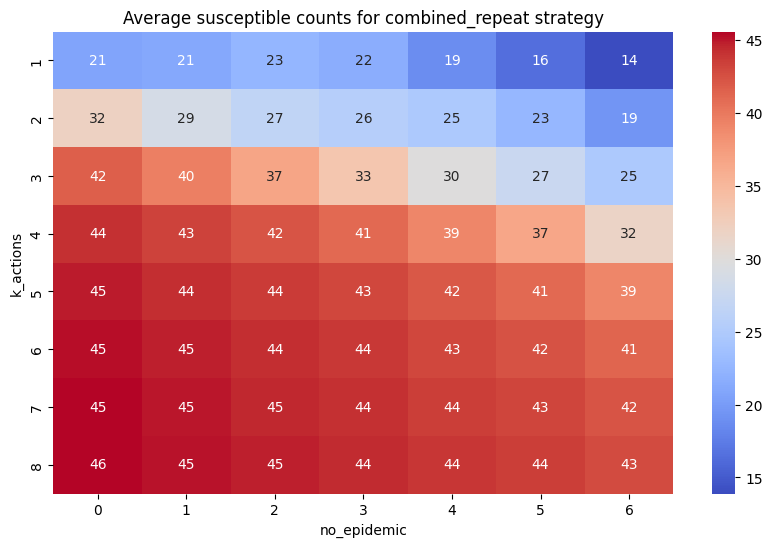

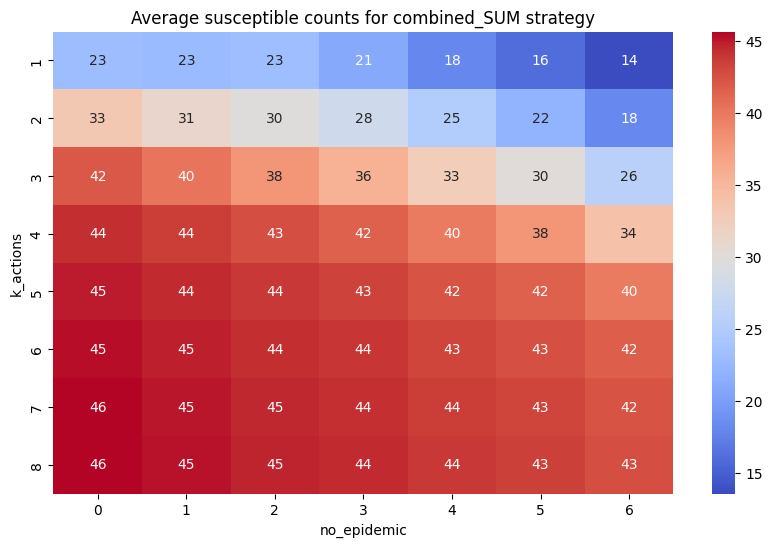

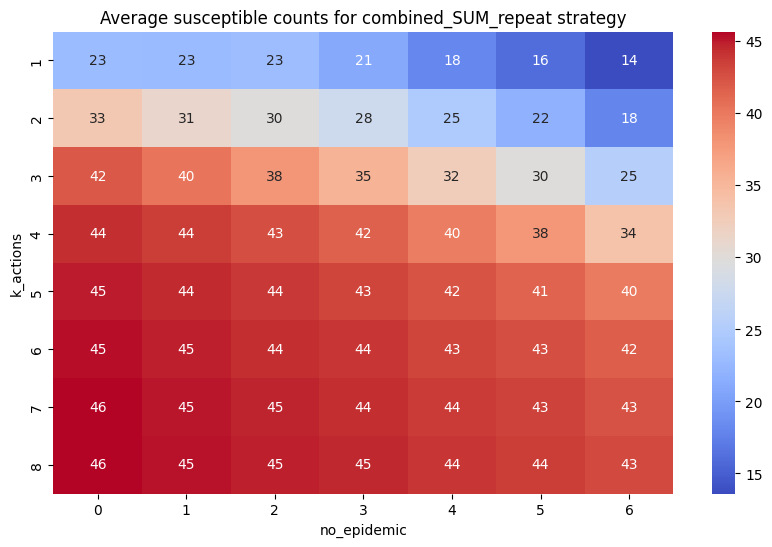

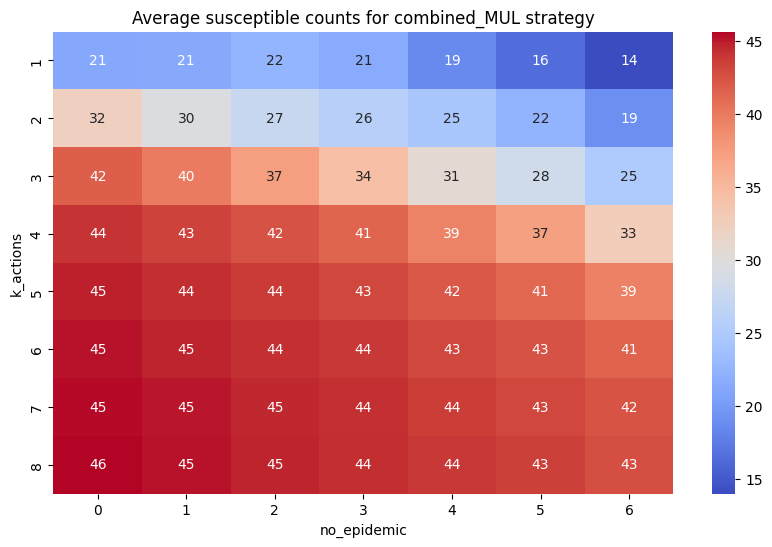

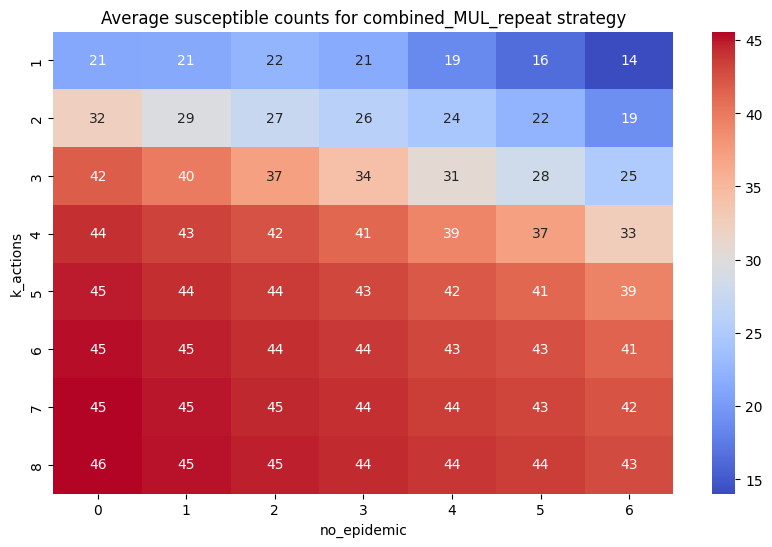

In [5]:
#@title All strategies average susceptible counts heatmap

for strategy in strat2:
    strategy_df = pd.read_csv(f'{strategy}_4Color.csv')

    unique_k_actions = sorted(strategy_df['k_actions'].unique())

    # Initialize a 2D array to store average susceptible counts
    avg_susceptible_counts = np.zeros((len(unique_k_actions), len(epidemic_cards)))

    # Iterate over all combinations of 'no_epidemic' and 'k_actions'
    for i, no_epi in enumerate(epidemic_cards):
        for j, k_act in enumerate(unique_k_actions):
            # Filter the DataFrame based on the current combination
            filtered_df = strategy_df[(strategy_df['no_epidemic'] == no_epi) & (strategy_df['k_actions'] == k_act)]

            # Calculate the average susceptible count for each run in the filtered DataFrame
            avg_susceptible_per_run = filtered_df.groupby('run')['susceptible_nodes'].mean()

            # Calculate the average susceptible count across all runs
            avg_susceptible = avg_susceptible_per_run.mean()

            # Store the average susceptible count in the 2D array
            avg_susceptible_counts[j, i] = avg_susceptible

    # Create the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(avg_susceptible_counts, cmap='coolwarm', annot=True, xticklabels=epidemic_cards, yticklabels=unique_k_actions)
    plt.xlabel('no_epidemic')
    plt.ylabel('k_actions')
    plt.title(f'Average susceptible counts for {strategy} strategy')
    plt.show()


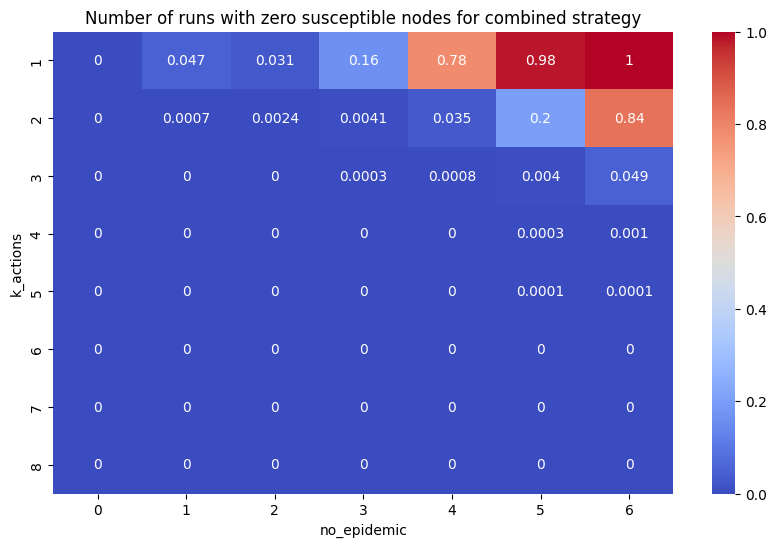

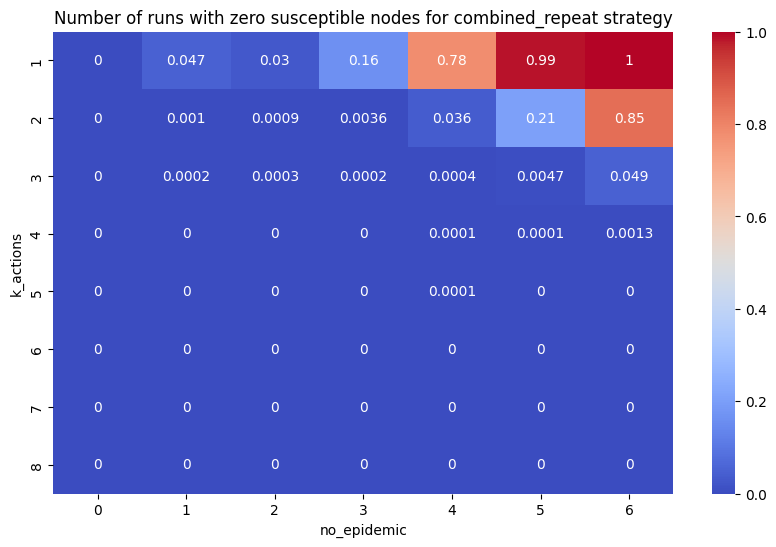

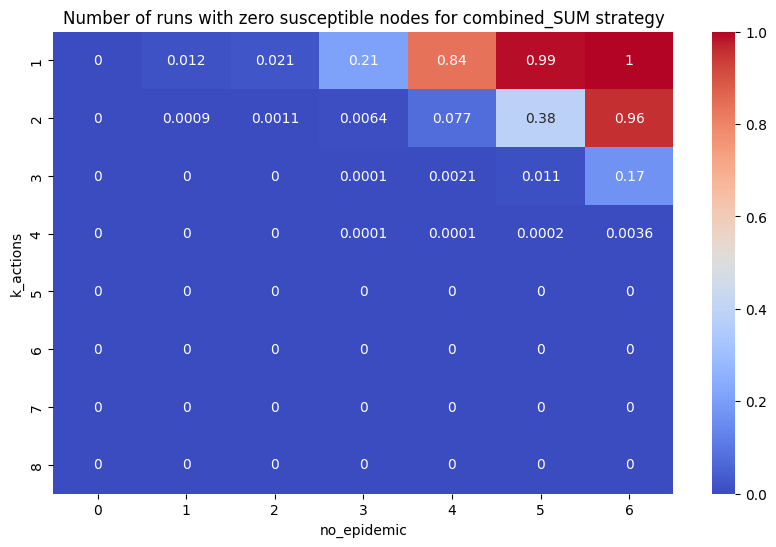

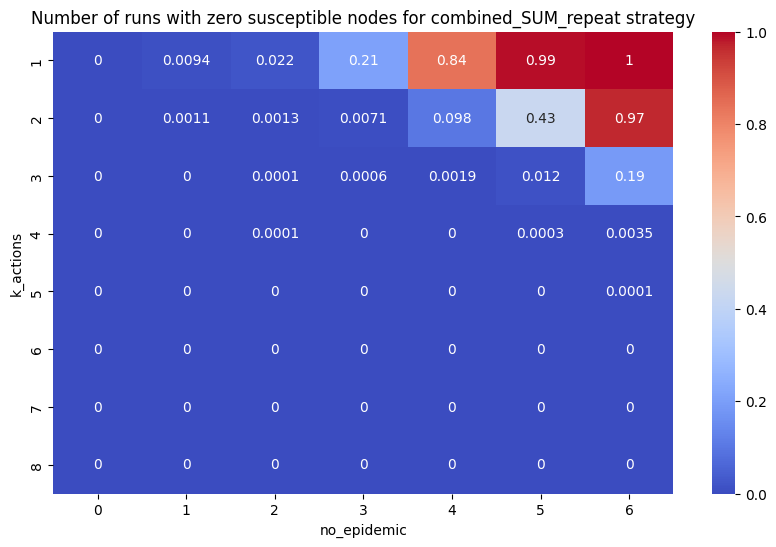

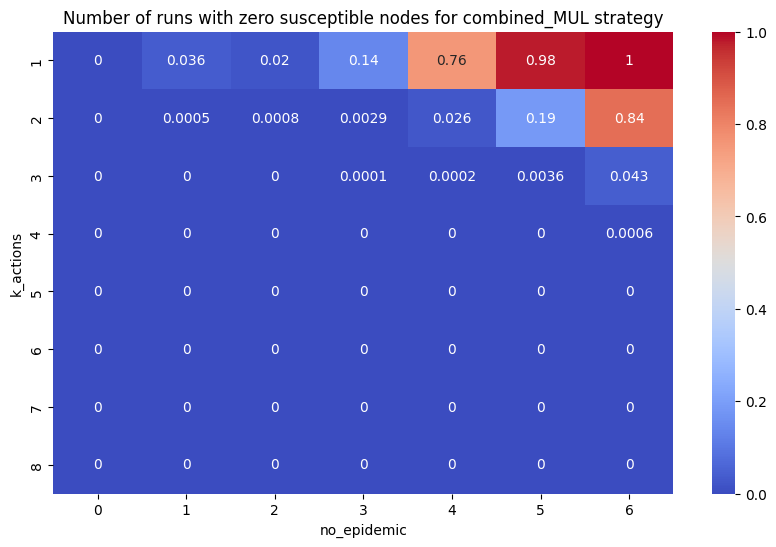

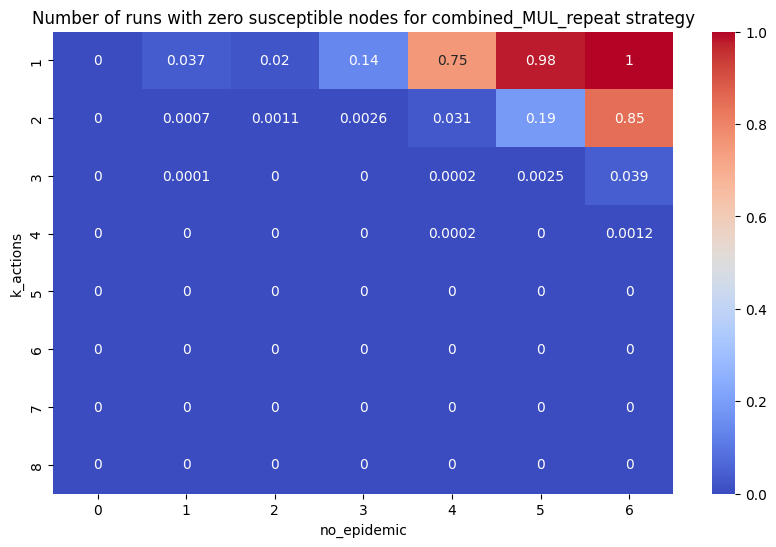

In [6]:
#@title All strategies zero susceptible counts heatmap

for strategy in strat2:
    strategy_df = pd.read_csv(f'{strategy}_4Color.csv')

    unique_k_actions = sorted(strategy_df['k_actions'].unique())

    # Initialize a 2D array to store counts of runs with zero susceptible nodes
    zero_susceptible_counts = np.zeros((len(unique_k_actions), len(epidemic_cards)))

    # Iterate over all combinations of 'no_epidemic' and 'k_actions'
    for i, no_epi in enumerate(epidemic_cards):
        for j, k_act in enumerate(unique_k_actions):
            # Filter the DataFrame based on the current combination
            filtered_df = strategy_df[(strategy_df['no_epidemic'] == no_epi) & (strategy_df['k_actions'] == k_act)]

            # Initialize counter for runs with zero susceptible nodes
            zero_susceptible_runs = 0

            # Iterate over each run in the filtered DataFrame
            for _, run in filtered_df.groupby('run'):
                # Check if any timestep within the run has 0 susceptible nodes
                if (run['susceptible_nodes'] == 0).any():
                    zero_susceptible_runs += 1

            # Store the count in the 2D array
            zero_susceptible_counts[j, i] = zero_susceptible_runs / 10000

    # Create the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(zero_susceptible_counts, cmap='coolwarm', annot=True, xticklabels=epidemic_cards, yticklabels=unique_k_actions)
    plt.xlabel('no_epidemic')
    plt.ylabel('k_actions')
    plt.title(f'Number of runs with zero susceptible nodes for {strategy} strategy')
    plt.show()


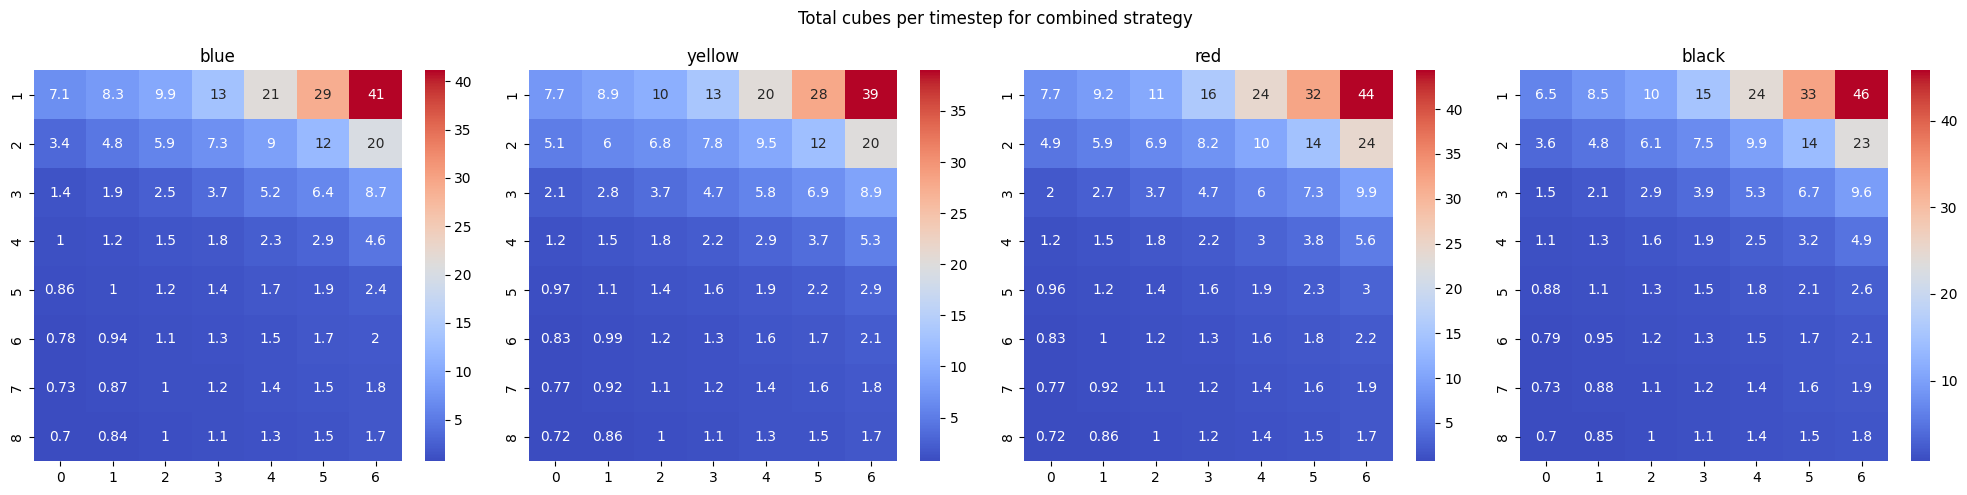

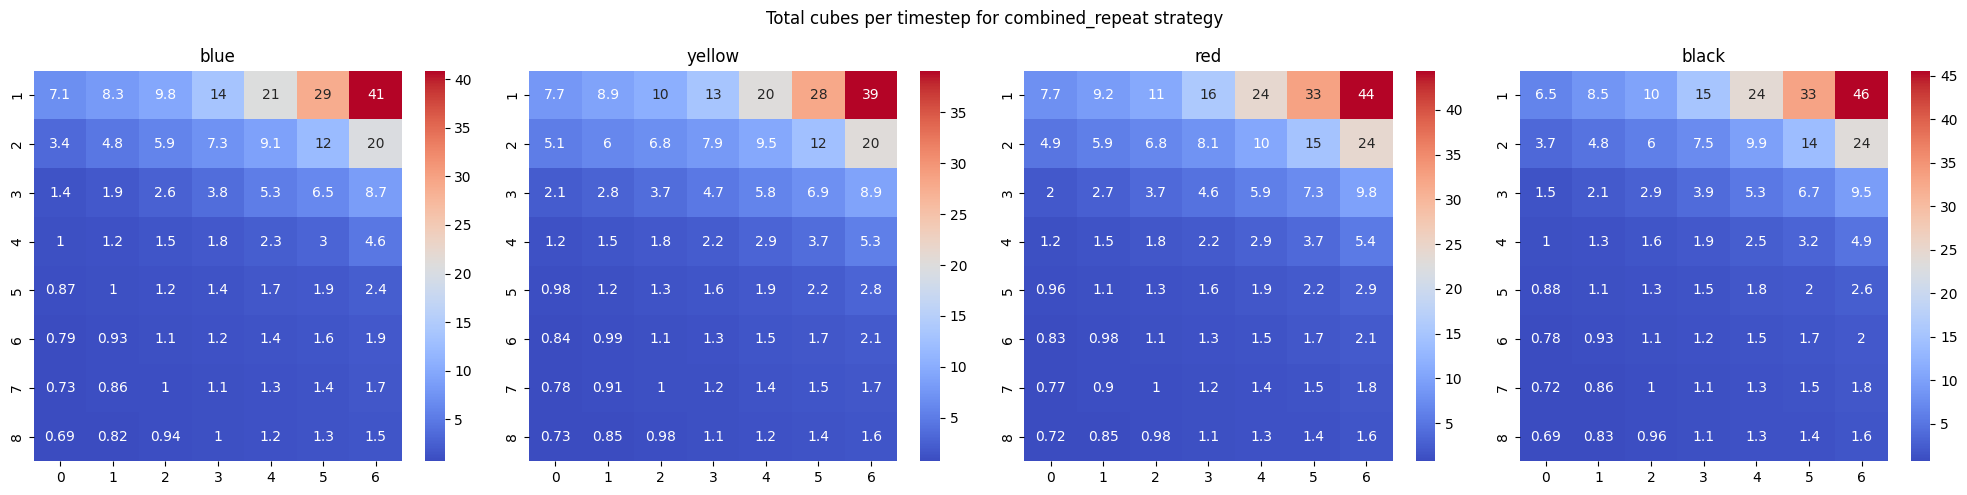

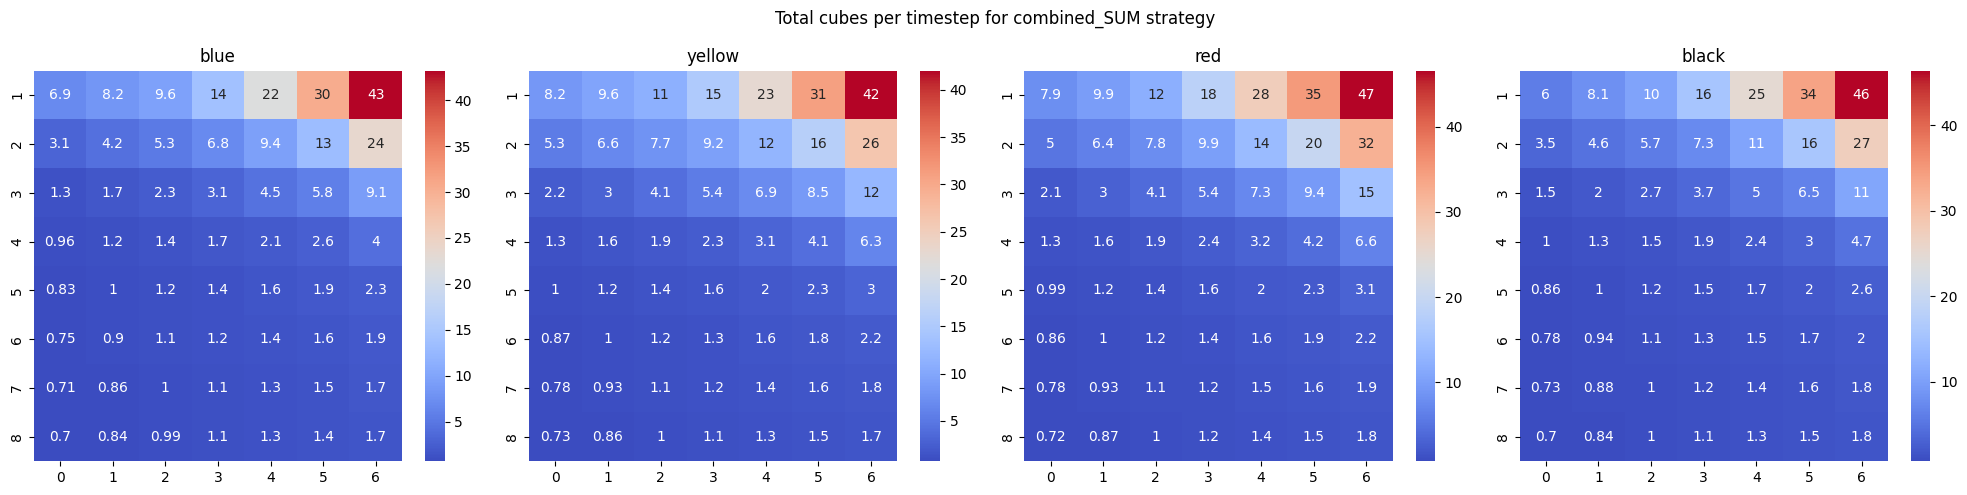

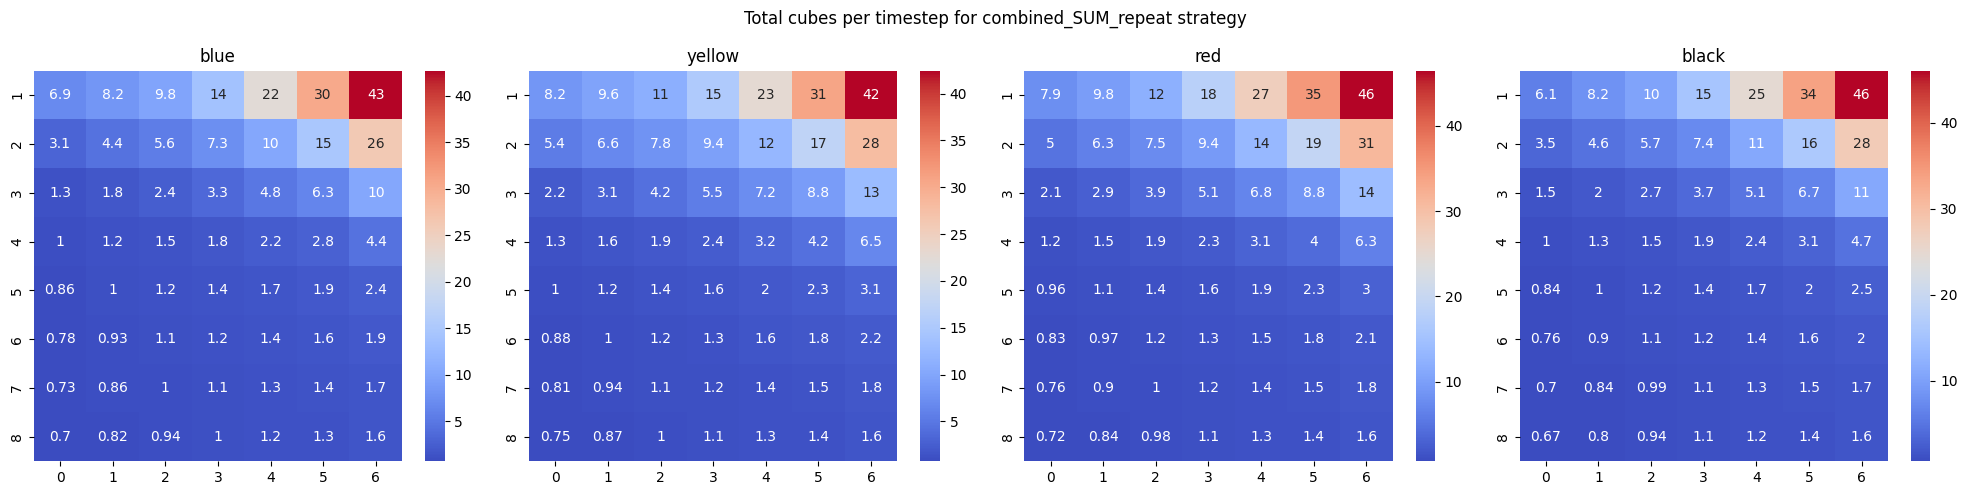

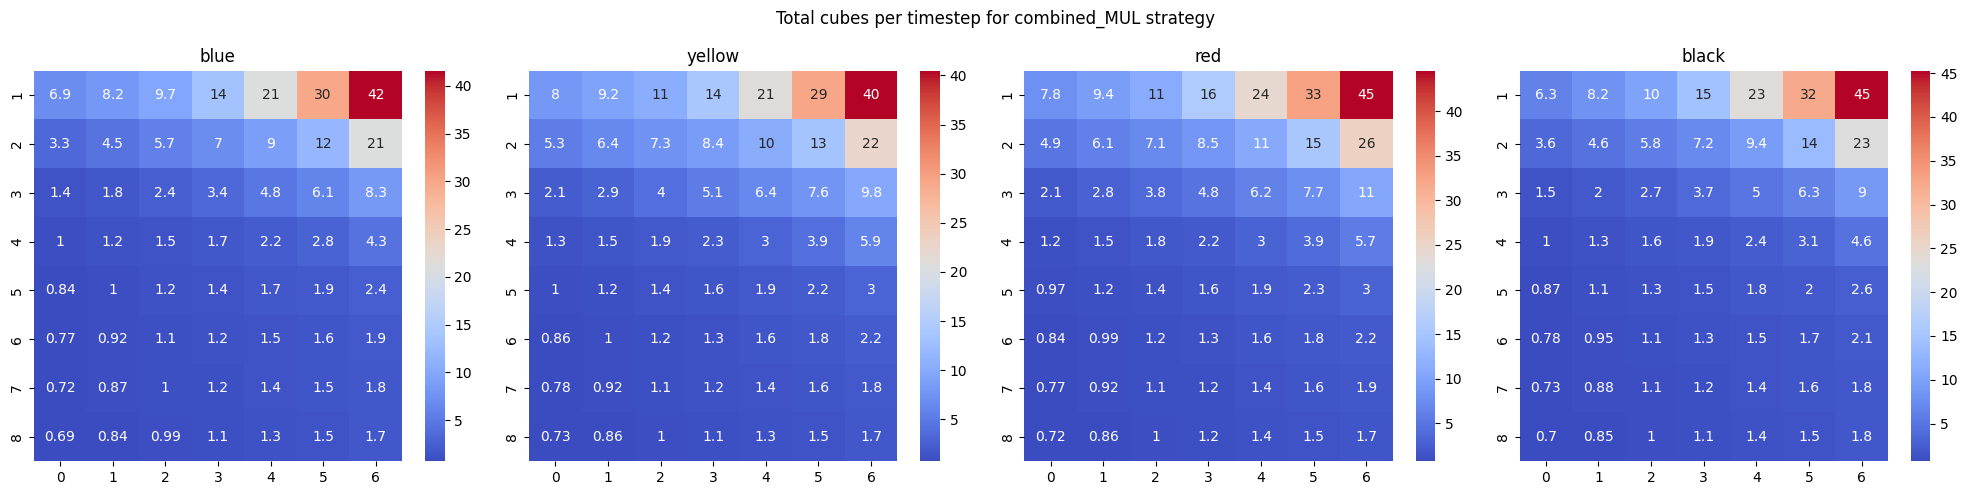

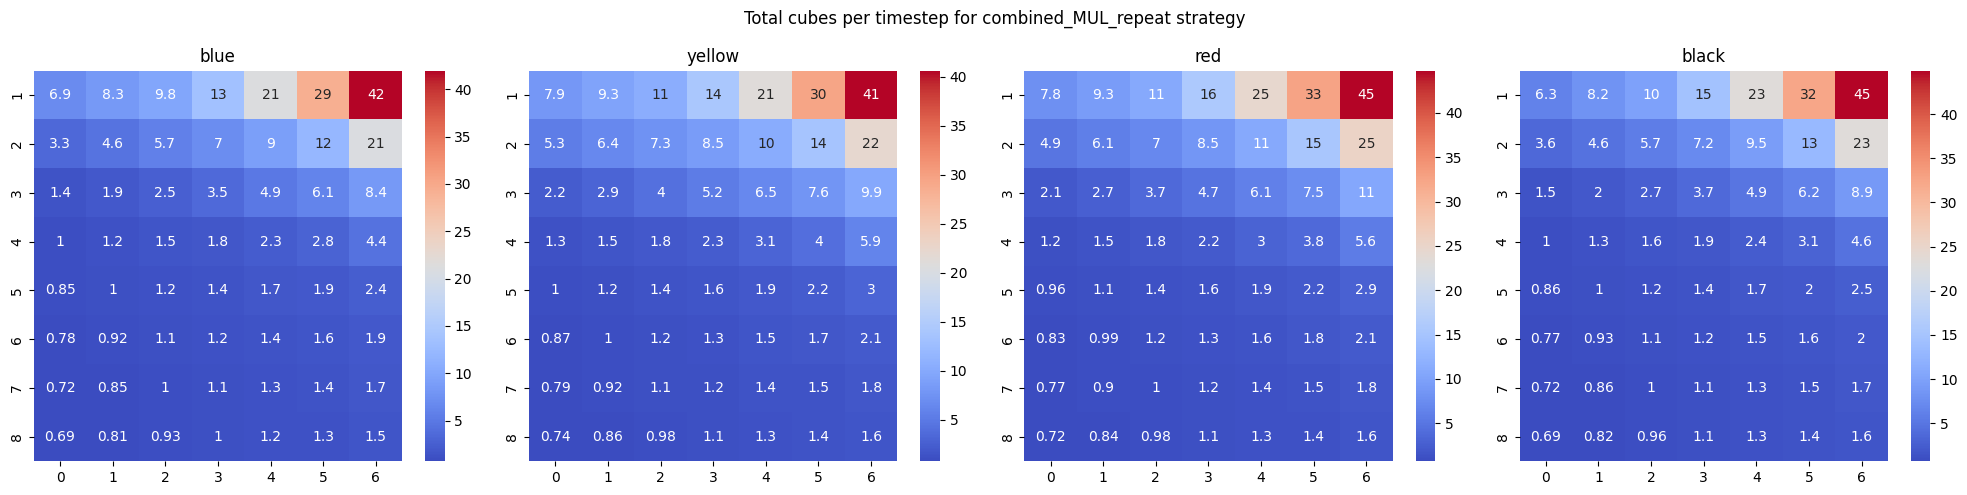

In [7]:
colors = ['blue', 'yellow', 'red', 'black']

for strategy in strat2:
    strategy_df = pd.read_csv(f'{strategy}_4Color.csv')

    unique_k_actions = sorted(strategy_df['k_actions'].unique())

    fig, axs = plt.subplots(1, 4, figsize=(20, 5))

    for ax, color in zip(axs, colors):
        # Initialize a 2D array to store total cubes per timestep for each color
        total_cubes_per_timestep = np.zeros((len(unique_k_actions), len(epidemic_cards)))

        # Iterate over all combinations of 'no_epidemic' and 'k_actions'
        for i, no_epi in enumerate(epidemic_cards):
            for j, k_act in enumerate(unique_k_actions):
                # Filter the DataFrame based on the current combination
                filtered_df = strategy_df[(strategy_df['no_epidemic'] == no_epi) & (strategy_df['k_actions'] == k_act)]

                # Calculate total cubes per timestep for each color
                total_cubes_per_timestep[j, i] = (filtered_df[f'infection_1_nodes_{color}'] + 2 * filtered_df[f'infection_2_nodes_{color}'] + 3 * filtered_df[f'infection_3_nodes_{color}']).mean()

        # Create the heatmap
        sns.heatmap(total_cubes_per_timestep, cmap='coolwarm', annot=True, xticklabels=epidemic_cards, yticklabels=unique_k_actions, ax=ax)
        ax.set_title(color)

    plt.suptitle(f'Total cubes per timestep for {strategy} strategy')
    plt.tight_layout()
    plt.show()
